# German Credit Risk Prediction

## Context¶
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

## Content
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:

Age (numeric)
Sex (text: male, female)
Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
Housing (text: own, rent, or free)
Saving accounts (text - little, moderate, quite rich, rich)
Checking account (numeric, in DM - Deutsch Mark)
Credit amount (numeric, in DM)
Duration (numeric, in month)
Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
Risk (Value target - Good or Bad Risk)

# Importing Libraries

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Dataset

In [99]:
df = pd.read_csv('german_credit_data.csv')

# Exploratory Data Analysis (EDA)

In [100]:
df.shape

(1000, 11)

In [101]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [102]:
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

- The dataset contains 1000 rows and 20 columns.  
- Target column is `Risk`, with classes: Good/Bad.  
- No severe imbalance detected.  


In [103]:
df["Saving accounts"].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [104]:
df["Checking account"].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [105]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [107]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# checking missing value
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Missing Values Check  

- No missing values were found in the dataset.  
 


In [183]:
# checking Duplicated row
df.duplicated().sum()

np.int64(0)

- No duplicate rows found .

In [110]:
df = df.dropna().reset_index(drop=True)
df.shape

(522, 11)

- After dropping missing value rows i got the shape of my dataset is (522,11)

In [111]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [112]:
df.drop(columns = 'Unnamed: 0' , inplace = True)

In [113]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [114]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [115]:
cat_cols

['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

In [116]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns.tolist()

In [117]:
num_cols

['Age', 'Job', 'Credit amount', 'Duration']

# Data Visualization

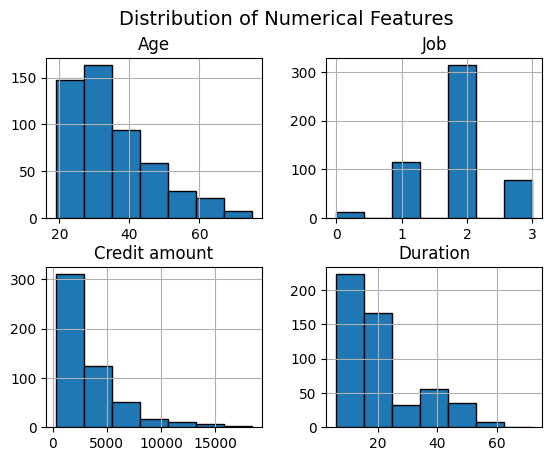

In [118]:
df[['Age', 'Job', 'Credit amount', 'Duration']].hist(bins=7,edgecolor="black")
plt.suptitle("Distribution of Numerical Features",fontsize = 14)
plt.show()

### Observation: Distribution of Numerical Features  

- **Age**: Most customers are in their 20s–40s, younger population dominates.  
- **Job**: Majority fall into category 2, while category 0 is rare.  
- **Credit Amount**: Right-skewed; most loans are small, very few are very large.  
- **Duration**: Most loan durations are below 30 months, few extend beyond 50 months.  


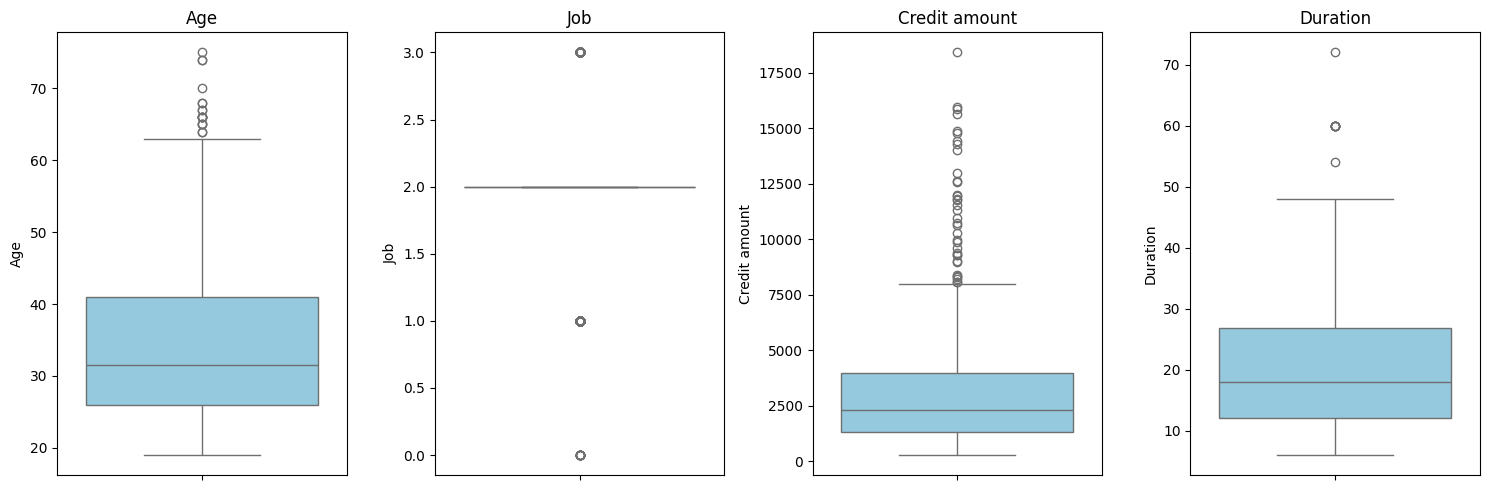

In [119]:
plt.figure(figsize =(15,5))
for i , col in enumerate(['Age', 'Job', 'Credit amount', 'Duration']):
    plt.subplot(1,4,i+1)
    sns.boxplot(y=df[col],color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

# Interpretation 
#### Age
- Median ≈ 30 years.
- Most customers are between 25–40 years.
-Outliers: People above 60–75 years.

#### Job
- Job is categorical (0–3), so boxplot isn’t very informative here.
- Almost everyone has Job = 2 (skilled workers).
- Very few are at 0, 1, or 3 → appear like “outliers” but actually just less frequent categories.

#### Credit amount
- Median ≈ 2500 DM.
- Most loans are under 7500 DM.
- Lots of outliers above 10,000 DM (some go up to 18,000 DM).
- his is expected in financial data—high loans are rare but valid.

#### Duration
- Median ≈ 18 months.
- Most loans last 12–30 months.

In [120]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [121]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

C:\Users\himan\AppData\Local\Temp\ipykernel_11736\3075445294.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
C:\Users\himan\AppData\Local\Temp\ipykernel_11736\3075445294.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
C:\Users\himan\AppData\Local\Temp\ipykernel_11736\3075445294.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index

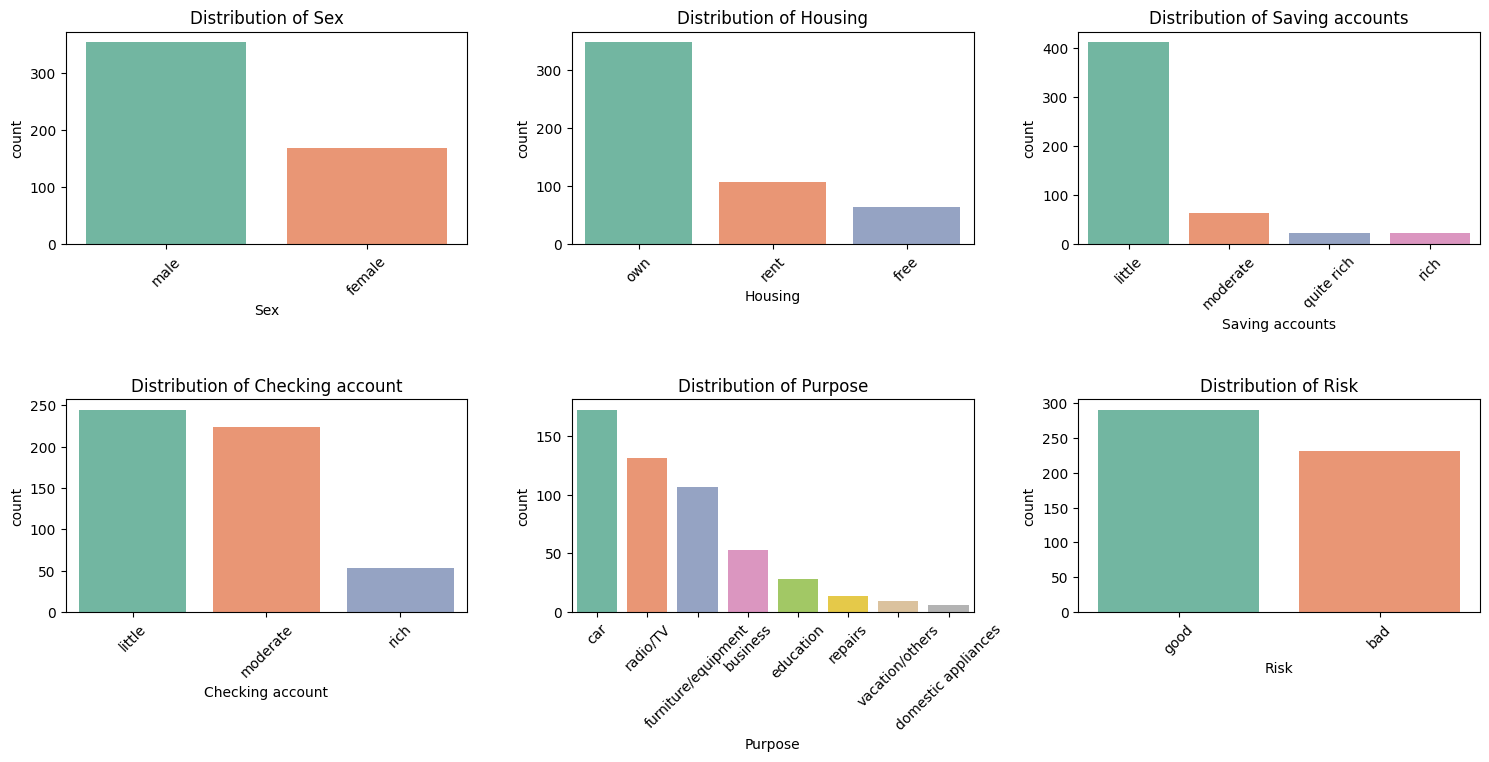

In [122]:
plt.figure(figsize=(15,10))

for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [123]:
corr = df[num_cols].corr()
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


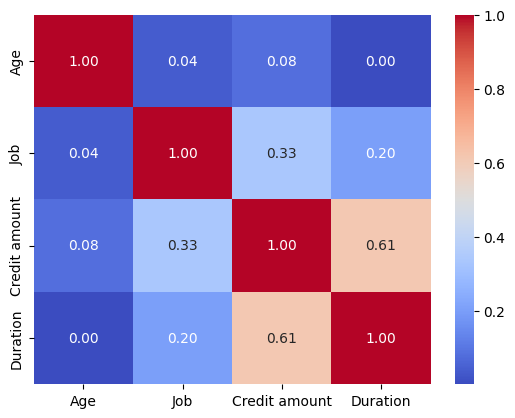

In [124]:
sns.heatmap(corr, annot= True ,cmap ="coolwarm",fmt=".2f")
plt.show()

# Interpretation
- Age & Credit amount → 0.08 → almost no relation.
- Job & Credit amount → 0.33 → weak positive correlation.
- Credit amount & Duration → 0.61 → moderate positive correlation

In [125]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [126]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [127]:
pd.pivot_table(df , values="Credit amount", index = "Housing",columns ="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


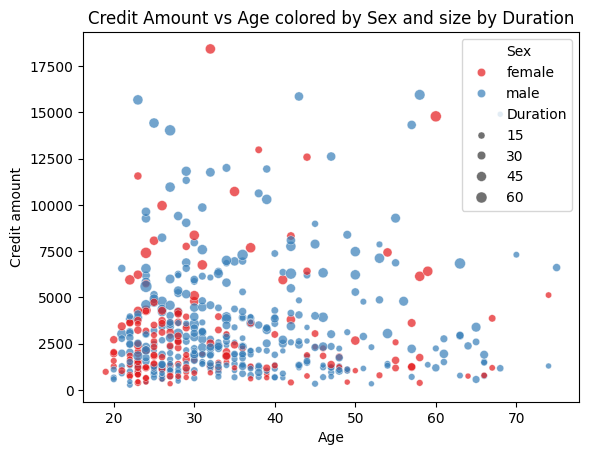

In [128]:
sns.scatterplot(data = df , x = "Age" , y = "Credit amount", hue ="Sex", size ="Duration",alpha =0.7,palette="Set1")
plt.title("Credit Amount vs Age colored by Sex and size by Duration")
plt.show()

# Insights from the plot
- Most loans are concentrated for people aged 20–40.
- Younger customers take more loans.
- Credit amount is spread widely, but most loans are below ~5000.
- Few extreme cases (~15k–18k).
- Duration (bubble size):
- Larger loan durations appear at higher credit amounts.
- Makes sense — bigger loans are often taken for longer durations.
- Sex differences:
- Both male and female distributions look quite similar.
- No strong visual evidence that one sex takes significantly higher/lower loans.

<Figure size 800x600 with 0 Axes>

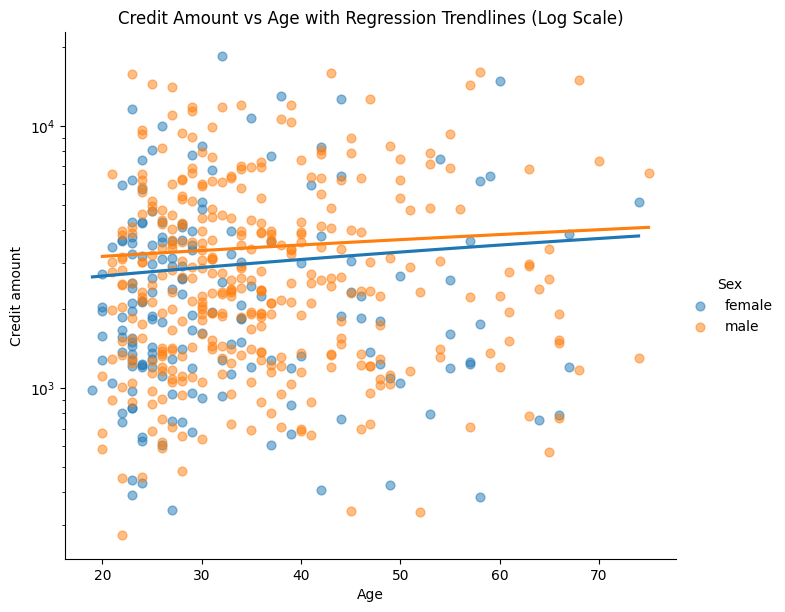

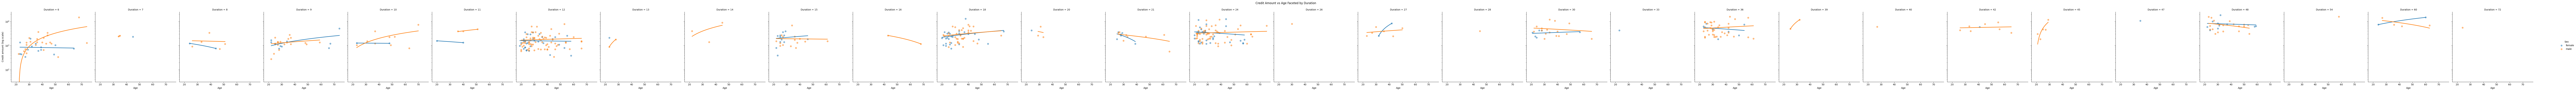

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Scatterplot with regression trendlines for male/female
plt.figure(figsize=(8,6))
sns.lmplot(
    data=df, 
    x="Age", 
    y="Credit amount", 
    hue="Sex", 
    scatter_kws={"alpha":0.5, "s":40}, # lighter scatter
    height=6, 
    aspect=1.2, 
    ci=None # no confidence interval shading
)
plt.yscale("log")  # 2. Applying log scale to Credit amount
plt.title("Credit Amount vs Age with Regression Trendlines (Log Scale)")
plt.show()


# 3. Facet by Duration
g = sns.lmplot(
    data=df, 
    x="Age", 
    y="Credit amount", 
    hue="Sex", 
    col="Duration",   # facet by Duration
    scatter_kws={"alpha":0.5, "s":40},
    height=5, 
    aspect=1, 
    ci=None
)
g.set(yscale="log")  # log scale for each facet
g.set_titles("Duration = {col_name}")
g.set_axis_labels("Age", "Credit amount (log scale)")
plt.suptitle("Credit Amount vs Age Faceted by Duration", y=1.05)
plt.show()


# Interpretation
- General Trend: Both trendlines are almost flat, but slightly positive → older applicants tend to take slightly higher credit amounts, but the effect is weak.
- Sex Difference:
- The male line (orange) is consistently a little higher than the female line.
- Meaning: on average, men tend to take slightly higher credit amounts than women across all ages.
- Variance:
- A lot of spread at every age → age alone doesn’t explain credit amount.
- Some very high outliers (10,000+ credit) exist for both sexes.

C:\Users\himan\AppData\Local\Temp\ipykernel_11736\2141610481.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df , x = "Saving accounts",y = "Credit amount" , palette = "Pastel1")


Text(0.5, 1.0, 'Credit amount distribution by saving amount')

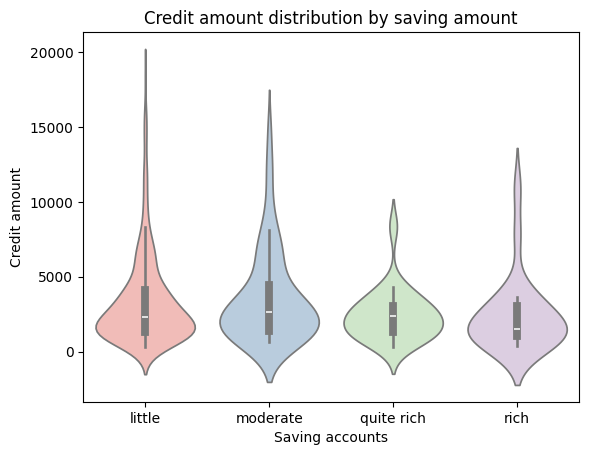

In [130]:
sns.violinplot(data = df , x = "Saving accounts",y = "Credit amount" , palette = "Pastel1")
plt.title("Credit amount distribution by saving amount")

# Interpretation
#### Little savings:
- Wide base at the bottom (many low-credit applicants).
- But also some very high outliers (loans above 15,000).
- Suggests: people with little savings often request small loans, but a few ask for very large ones.
 
#### Moderate savings:
- Similar shape to “little”.
- Distribution is spread out with high outliers (~16,000+).
  
#### Quite rich:
- Distribution shifts upward: median and interquartile range are higher compared to “little” and “moderate”.
- Fewer extreme outliers compared to “little”.

#### Rich:
- Similar to “quite rich” but slightly lower spread.
- Median around 3,000–4,000.
- Some outliers above 10,000.

In [131]:
df["Risk"].value_counts(normalize=True)*100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

C:\Users\himan\AppData\Local\Temp\ipykernel_11736\2841609874.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y=col, palette="Pastel2")
C:\Users\himan\AppData\Local\Temp\ipykernel_11736\2841609874.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y=col, palette="Pastel2")
C:\Users\himan\AppData\Local\Temp\ipykernel_11736\2841609874.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y=col, palette="Pastel2")
C:\Users\himan\AppData\Local\Temp\ipykernel_11736\2841609874.py:12: Fu

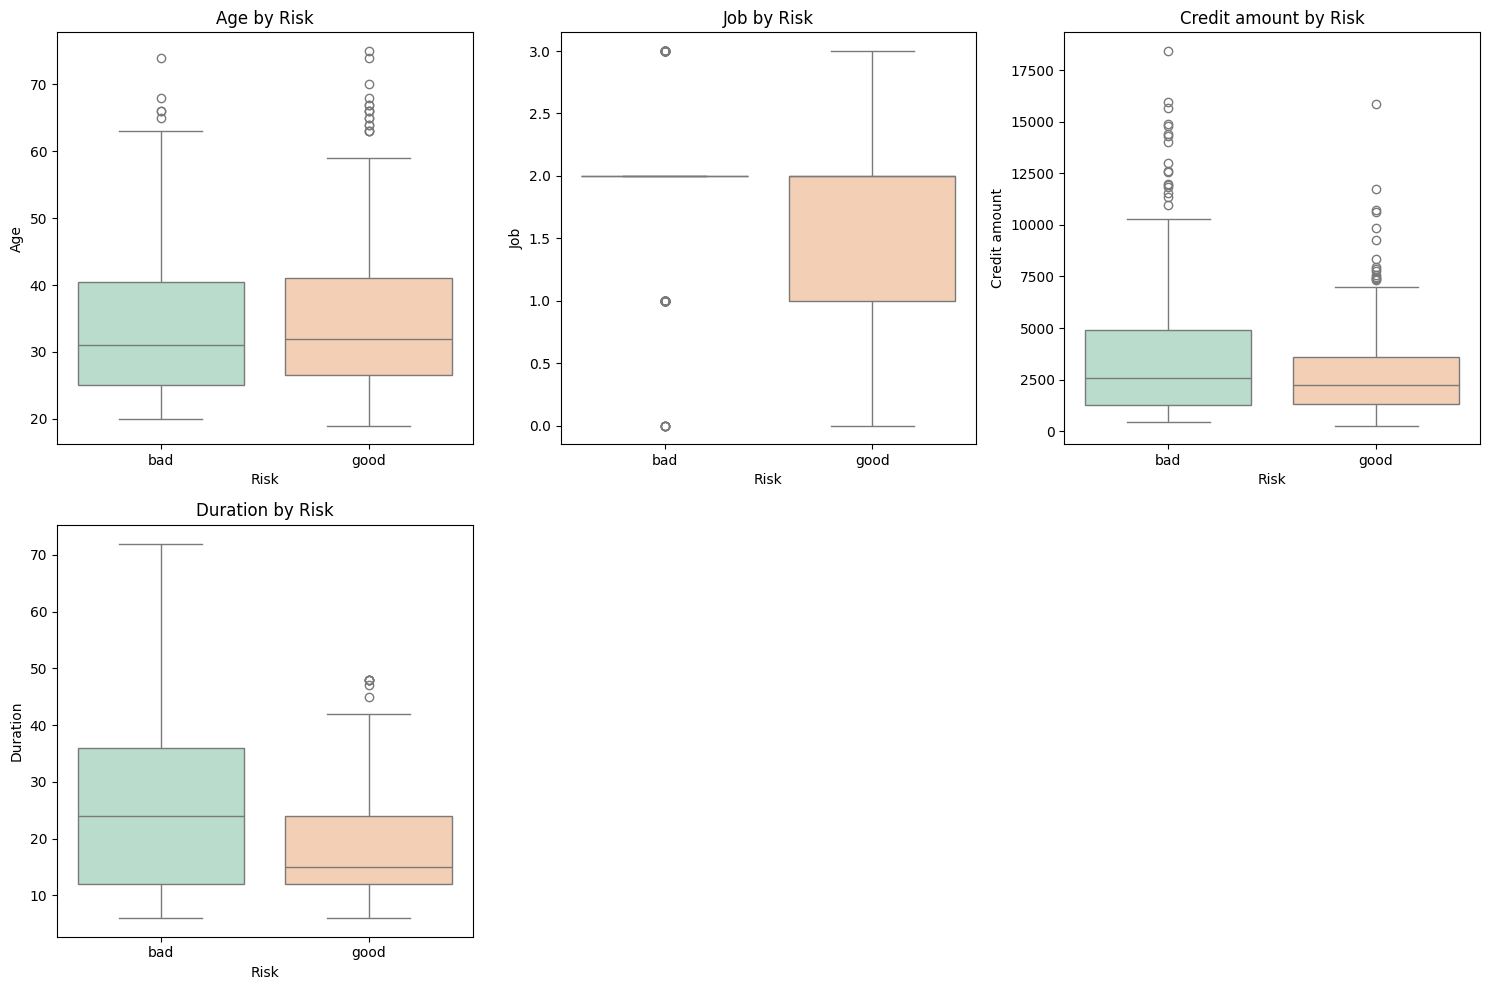

In [132]:
# Box plot fpr the numerical columns
import math

n = len(num_cols)
rows = math.ceil(n / 3)   # adjust rows dynamically
cols = 3                  # keep 3 plots per row

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(data=df, x="Risk", y=col, palette="Pastel2")
    plt.title(f"{col} by Risk")

plt.tight_layout()
plt.show()


### Observation: Boxplots of Features by Risk

- **Age by Risk**: Both groups have similar age distribution, but "good" risk customers tend to be slightly younger on average.  
- **Job by Risk**: No strong difference between risk categories based on job type.  
- **Credit Amount by Risk**: Customers with "bad" risk usually take higher loan amounts compared to "good" risk customers.  
- **Duration by Risk**: "Bad" risk customers tend to have longer loan durations compared to "good" risk customers.  


In [133]:
df.groupby("Risk")[num_cols].mean()

,Age,Job,Credit amount,Duration
Risk,,,,
bad,34.147186,1.913420,3881.090909,25.445887
good,35.477663,1.845361,2800.594502,18.079038


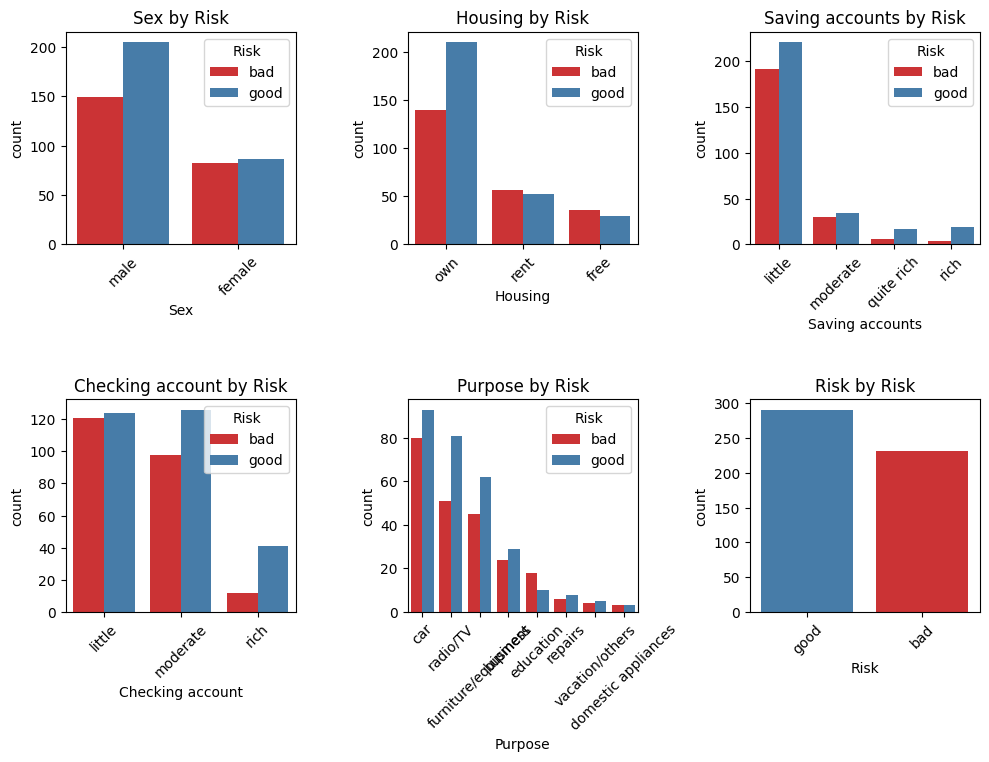

In [134]:
plt.figure(figsize =(10,10))
for i,col in enumerate(cat_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data = df , x = col , hue ="Risk" , palette = "Set1" , order =df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observation: Count Plots by Risk

- **Sex by Risk**: Both males and females have higher proportion of "good" risk, with males being the majority.  
- **Housing by Risk**: Customers who own houses are mostly "good" risk. Renters and free housing groups are more balanced.  
- **Saving Accounts by Risk**: Customers with little or no savings are more likely to be "bad" risk, while higher savings indicate "good" risk.  
- **Checking Account by Risk**: Rich and moderate checking account holders are mostly "good" risk; those with little balance show higher "bad" risk.  
- **Purpose by Risk**: Loans for car, radio/TV, and furniture are common. Across purposes, "good" risk dominates, but "bad" risk is significant in car and radio/TV loans.  
- **Risk Distribution**: Overall, "good" risk customers are more than "bad" risk customers.  


In [135]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [136]:
features = ["Age" , "Sex" , "Job" ,"Housing","Saving accounts" , "Checking account" , "Credit amount","Duration"]

In [137]:
target = "Risk"

In [138]:
df_model = df[features + [target]].copy()

In [139]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


#  Preprocessing

In [140]:
# Feature engineering 
from sklearn.preprocessing import LabelEncoder
import joblib

In [141]:
categorical_cols = df_model.select_dtypes(include = "object").columns.drop("Risk")
categorical_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [142]:
from sklearn.preprocessing import LabelEncoder
import joblib

print("Categorical Columns:", categorical_cols)

# Encode
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))  
    le_dict[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")


print(df_model.head())
print(df_model["Sex"].unique())


Categorical Columns: Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')
   Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0   22    0    2        1                0                 1           5951   
1   45    1    2        0                0                 0           7882   
2   53    1    2        0                0                 0           4870   
3   35    1    3        2                0                 1           6948   
4   28    1    3        1                0                 1           5234   

   Duration  Risk  
0        48   bad  
1        42  good  
2        24   bad  
3        36  good  
4        30   bad  
[0 1]


In [143]:
le_target = LabelEncoder()
target = 'Risk'

In [144]:
df_model[target] = le_target.fit_transform(df_model[target])

In [145]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [146]:
joblib.dump(le_target,"target_encoder.pkl")

['target_encoder.pkl']

In [147]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


# Model Building

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X = df_model.drop(target,axis = 1)

In [150]:
y = df_model[target]

In [151]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [152]:
df_model.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Risk'],
      dtype='object')

In [153]:
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [154]:
X_train , X_test , y_train, y_test = train_test_split(X ,y, test_size =0.2 , stratify = y , random_state = 1)
# The model learns from X_train & y_train and then predicts on X_test. We finally compare predictions with y_test to see how accurate it is.)

In [155]:
X_train.shape

(417, 8)

In [156]:
X_test.shape

(105, 8)

In [157]:
y_train.shape 

(417,)

In [158]:
y_test.shape

(105,)

# Tree based model

In [159]:
 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [160]:
def train_model(model , param_grid , X_train , y_train , X_test , y_test):
    grid = GridSearchCV(model , param_grid , cv = 5 , scoring = "accuracy", n_jobs = -1)
    grid.fit(X_train , y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test , y_pred)
    return best_model , acc , grid.best_params_

## DecisionTreeClassifier

In [161]:
dt =  DecisionTreeClassifier(random_state = 1 , class_weight = 'balanced')
dt_param_grid = {
    "max_depth" : [3,5,7,10,None],
    "min_samples_split" : [2,5,10] ,
    "min_samples_leaf" :[1,2,4]
}

In [162]:
best_dt , acc_dt , params_dt =  train_model(dt , dt_param_grid , X_train , y_train , X_test , y_test)

In [163]:
print("Decision Tree Accuracy ",acc_dt)

Decision Tree Accuracy  0.580952380952381


In [164]:
print("Best parameter",params_dt)

Best parameter {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Observation: Decision Tree Classifier
- The Decision Tree achieved an accuracy of **0.58**.  
- Best parameters found:  
  - `max_depth = 5`  
  - `min_samples_leaf = 1`  
  - `min_samples_split = 2`  
- Accuracy is relatively low, suggesting that the model may be underfitting and further tuning or trying advanced models could improve performance.  


## RandomForestClassifier

In [165]:
rf = RandomForestClassifier(random_state = 1 , class_weight = "balanced",n_jobs =-1)

In [166]:
rf_param_grid ={
    "n_estimators":[100,200],  #The number of trees in the forest.
    "max_depth":[5,7,10,None],  #The maximum depth of the tree
    "min_samples_split":[2,5,10], #The minimum number of samples required to split an internal node
    "min_samples_leaf":[1,2,4] #:The minimum number of samples required to be at a leaf node.

}

In [167]:
best_rf,acc_rf,params_rf = train_model(rf,rf_param_grid,X_train,y_train,X_test,y_test)

In [168]:
print("Random Forest accuracy :",acc_rf)

Random Forest accuracy : 0.6190476190476191


In [169]:
print("Best Parameter:",params_rf)

Best Parameter: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


### Observation: Random Forest Classifier
- The Random Forest achieved an accuracy of **0.62**, which is higher than the Decision Tree (0.58).  
- Best parameters found:  
  - `max_depth = None`  
  - `min_samples_leaf = 2`  
  - `min_samples_split = 10`  
  - `n_estimators = 100`  
- Random Forest performed better than Decision Tree due to its ensemble nature, but accuracy is still modest, indicating potential for improvement with other models or feature engineering.


# ExtraTreeClassifier

In [170]:
et = ExtraTreesClassifier(random_state = 1, class_weight = "balanced" ,n_jobs=-1)

In [171]:
et_param_grid ={
    "n_estimators":[100,200],  
    "max_depth":[5,7,10,None],  
    "min_samples_split":[2,5,10], 
    "min_samples_leaf":[1,2,4] 
}

In [172]:
best_et , acc_et , param_et = train_model(et,et_param_grid,X_train,y_train,X_test,y_test)

In [173]:
print("Extra Tree Classifier accuracy :",acc_et)

Extra Tree Classifier accuracy : 0.6476190476190476


In [174]:
print("Best Parameter of Extra Tree Classifer :",param_et)

Best Parameter of Extra Tree Classifer : {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


### Observation: Extra Trees Classifier
- The Extra Trees Classifier achieved the **highest accuracy so far: 0.65**.  
- Best parameters found:  
  - `max_depth = 10`  
  - `min_samples_leaf = 2`  
  - `min_samples_split = 5`  
  - `n_estimators = 100`  
- Extra Trees outperformed both Decision Tree (0.58) and Random Forest (0.62), showing that its randomized split strategy and larger ensemble provide better generalization.  


# XGBClassifier

In [175]:
xgb = XGBClassifier(random_state = 1, scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum() , use_label_encoder = False , eval_metrics = "logloss")

In [176]:
xgb_params_grid ={
    "n_estimators":[100,200],
    "max_depth":[3,5,7],
    "learning_rate":[0.01,0.1,0.2],
    "subsample":[0.7,1],
    "colsample_bytree" :[0.7,1]
}

In [177]:
best_xgb,acc_xgb , param_grid = train_model(xgb , xgb_params_grid ,X_train,y_train,X_test,y_test)

C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:53:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [178]:
print("XGB accuracy ",acc_xgb)

XGB accuracy  0.6761904761904762


In [179]:
print("Best parameter ",param_grid)

Best parameter  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


XGBoost outperformed all other models with the **highest accuracy (≈68%)**, showing that boosting with tuned hyperparameters gives better generalization on this dataset compared to Decision Trees, Random Forest, and Extra Trees.


## Model Performance Comparison

| Model                | Best Parameters                                                                 | Accuracy |
|-----------------------|---------------------------------------------------------------------------------|----------|
| Decision Tree         | max_depth=5, min_samples_leaf=1, min_samples_split=2                           | 0.58     |
| Random Forest         | max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100     | 0.62     |
| Extra Trees           | max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100        | 0.65     |
| XGBoost               | colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1 | **0.68** |

### Key Observations
- **Decision Tree** had the lowest accuracy (0.58) and is prone to overfitting despite tuning.  
- **Random Forest** improved stability and accuracy to 0.62.  
- **Extra Trees** performed better (0.65), benefiting from more random splits.  
- **XGBoost** achieved the best accuracy (0.68), confirming its effectiveness for structured/tabular data.  


# Best Model Selection -(XGBoost)

In [180]:
best_xgb.predict(X_test)

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [86]:
joblib.dump(best_xgb,"best_xgb.pkl")

['best_xgb.pkl']

## Final Model: XGBoost  

- Selected as the best-performing model with accuracy ≈ 68%.  
- Final evaluation confirms stable performance on the test set.  
- XGBoost can handle feature interactions better than single trees or bagging methods.  


In [181]:
# Final prediction using the best XGB model
y_pred = best_xgb.predict(X_test)

# Checking accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Final XGB Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Final XGB Accuracy: 0.6761904761904762

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.61      0.62        46
           1       0.70      0.73      0.72        59

    accuracy                           0.68       105
   macro avg       0.67      0.67      0.67       105
weighted avg       0.67      0.68      0.68       105


Confusion Matrix:
 [[28 18]
 [16 43]]


In this project, we performed data preprocessing, visualization, encoding, and applied multiple ML models (Decision Tree, Random Forest, Extra Trees, and XGBoost). Among them, XGBoost achieved the best performance with ~68% accuracy, showing better prediction capability for the positive class